Taller 6
Daniel Suaza Varela - 202311517

In [450]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import diff,symbols,dsolve, expand_complex,Matrix, pi, cos, sin, simplify, eye, solve, latex, atan2, asin,pprint, init_printing, Derivative, sqrt, integrate, Eq, lambdify
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting
import sympy
# Configuración de impresión en formato LaTeX (MathJax)
init_vprinting(use_latex='mathjax')

Pregunta 1


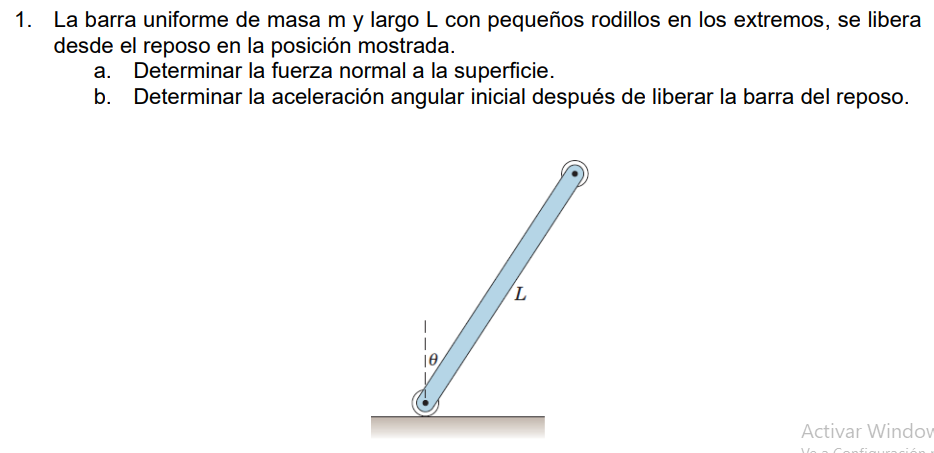

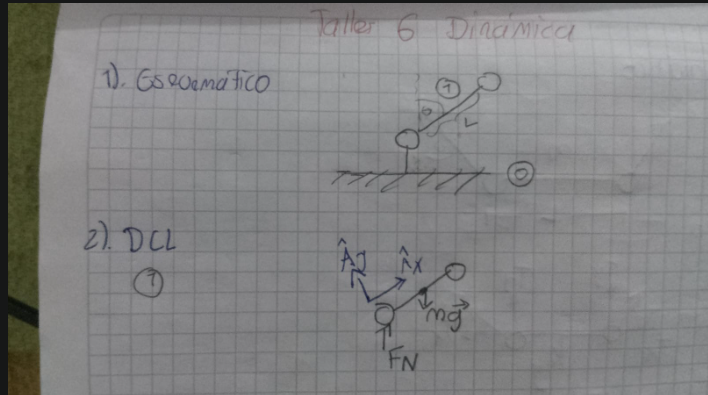

In [451]:
N = ReferenceFrame("N")
theta = dynamicsymbols("theta")
A = N.orientnew("A", "Axis", (pi/2-theta, N.z))

#Comprobación: Si theta es 0, A.x debe ser N.y
display(A.x.express(N).subs({theta:0}))

#Simbolos
m, g, L, t = symbols("m,g,L,t")
#Inercia
I = (1/12)*m*L**2 #inercia en cm

#Cinemática: Expresar posición cm, aceleración cm y alpha
rcm = (L/2)*A.x
acm = rcm.diff(t,N).diff(t,N)
alpha = theta.diff(t,t)

#Ecuaciones de Newton-Euler
peso = -m*g*N.y
F_n = symbols("F_n")
sumF = peso + F_n*N.y - m*acm

sumM = -rcm.cross(F_n*N.y) + I*(alpha)*N.z #en realidad es -I*alpha pero alpha tiene un negativo implícito ya que el ángulo está aumentando en sentido negativo

eqs = [sumF.dot(N.y), sumM.dot(N.z)] #

AA , b = sympy.linear_eq_to_matrix(eqs, [F_n, theta.diff(t,t)])

#Sustituimos por el reposo
Sol = AA.solve(b).subs({theta.diff(t):0})
print("Valor F_n")
F_n = Sol[0].simplify()
display(F_n)
print("Valor alpha")
alpha_value = Sol[1].simplify()
display(alpha_value)

n_y

Valor F_n


     0.333333333333333⋅g⋅m     
───────────────────────────────
       2                       
1.0⋅sin (θ) + 0.333333333333333

Valor alpha


           2.0⋅g⋅sin(θ)            
───────────────────────────────────
  ⎛       2                       ⎞
L⋅⎝1.0⋅sin (θ) + 0.333333333333333⎠

Estos valores son bastante distintos en apariencia a lo esperado según la solución subida a bloque neón. Intentemos comprobar con valores de theta =  0, pi/4, pi/8, pi/2, pi, 3*pi/2, 2*pi

In [452]:
valores_theta = [0, pi/4, pi/8, pi/2, pi, 3*pi/2, 2*pi]
params = {m:1, g:10, L:1}
error_fn = []
error_alpha = []
for theta_v in valores_theta:
    params[theta] = theta_v
    f_n_profe = m*g / (1+3* (sin(theta)**2))

    alpha_profe = (6*g*sin(theta) )/ (L*(1+3*(sin(theta)**2)) )
    e_fn = round(f_n_profe.subs(params) - F_n.subs(params),2)
    e_alpha = round(alpha_profe.subs(params) - alpha_value.subs(params),2)
    
    error_fn.append(e_fn)
    error_alpha.append(e_alpha)
    
print(error_fn)
print(error_alpha)
print("Error promedio fuerza normal: ", sum(error_fn)/len(error_fn))
print("Error promedio alpha:", sum(error_alpha)/len(error_alpha))    

[0, 0, 0.0, 0, 0, 0, 0]
[0, 0.0, 0.0, 0, 0, 0, 0]
Error promedio fuerza normal:  0
Error promedio alpha: 0


Pregunta 2

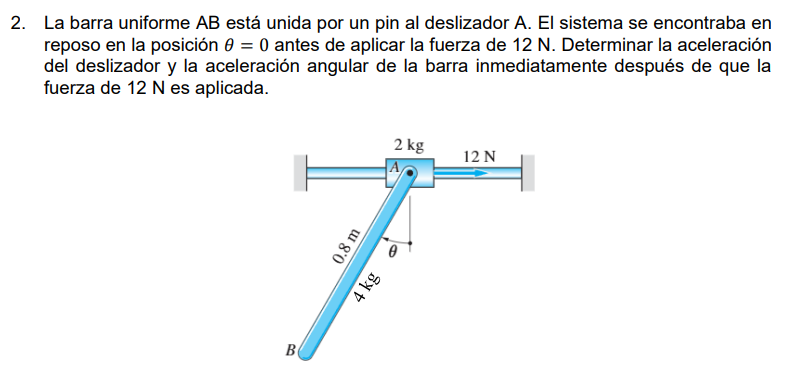

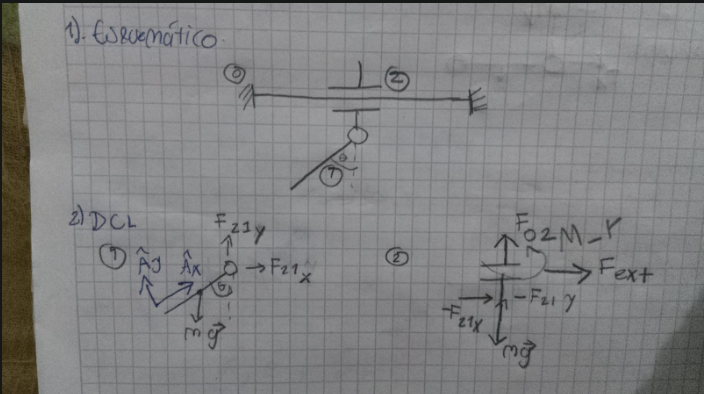

In [453]:
N = ReferenceFrame("N") #Nuestro marco de referencia se ubica en la pared izquierda que sostiene al slider

theta, x = dynamicsymbols("theta, x") #x lo usamos para definir la posición del slider
A = N.orientnew("A", "Axis", (-theta - pi/2,N.z)) 

#Comprobación: Para theta 0, deberíamos obtener el eje y negativo
display(A.x.express(N).subs({theta:0}))

#Planteamos simbolos
#El cuerpo 1 es la barra, el cuerpo 2 el slider
m1, m2, L, g, t, F_ext = symbols("m1, m2, L, g, t, F_ext ")

#Hallamos inercia
I_barra = (1/12)*m1*L**2

#Planteamos ecuaciones de Newton-Euler para el cuerpo 1
r_cm_1 = x*N.x - (L/2)*A.x #tenemos que, desde N, movernos hasta donde está el slider (x*N.x) y luego bajar diagonalmente L/2 para llegar al centro de masa (-L/2)*A.x
a_cm_1 = r_cm_1.diff(t,N).diff(t,N)
alpha = theta.diff(t,t)

F_21_x, F_21_y = symbols("F_21_x, F_21_y")
sumF1 = -m1*g*N.y + F_21_x*N.x + F_21_y*N.y - m1*a_cm_1 #peso, reaccion y m*a
sumM1 = (L/2*A.x).cross(F_21_x*N.x) + (L/2*A.x).cross(F_21_y*N.y) + I_barra*(alpha)*N.z #Si el angulo aumenta, eso es sentido negativo

#Planteamos ecuaciones de Newton-Euler para el cuerpo 2
r_cm_2 = x*N.x
a_cm_2 = r_cm_2.diff(t,N).diff(t,N)
F_02 = symbols("F_02")
sumF2 = F_02*N.y + F_ext*N.x - (F_21_x*N.x + F_21_y*N.y) -m2*g*N.y -m2*a_cm_2 #normal, externa, reaccion, peso y m*a
#No hay ecuacion de momentos porque no está girando, el momento de la reacción es 0 por este motivo

eqs = [sumF1.dot(N.x), sumF1.dot(N.y),sumF2.dot(N.x), sumF2.dot(N.y), sumM1.dot(N.z)]
incognitas = [x.diff(t,t), theta.diff(t,t), F_02, F_21_x, F_21_y] #desconocemos theta doble punto, x doble punto y las reacciones
AA , b = sympy.linear_eq_to_matrix(eqs, incognitas)

sol = AA.solve(b)
sol

-n_y

⎡                                                                              ↪
⎢                                                                          2.0 ↪
⎢                                                                          ─── ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                           

In [454]:
a_2_x_value = sol[0].simplify()
display(a_2_x_value)

alpha_value = sol[1].simplify()
display(alpha_value)

params = {theta:0, theta.diff(t):0, m1:4, m2:2, L:0.8, F_ext:12, g:9.81}
print("Aceleración del slider:")
print(round(a_2_x_value.subs(params),1))

print("Aceleración angular:")
print(round(alpha_value.subs(params),2))

                                                      2                    
2.66666666666667⋅Fₑₓₜ + 1.33333333333333⋅L⋅m₁⋅sin(θ)⋅θ̇  - 1.0⋅g⋅m₁⋅sin(2⋅θ)
───────────────────────────────────────────────────────────────────────────
                  2                                                        
        2.0⋅m₁⋅sin (θ) + 0.666666666666667⋅m₁ + 2.66666666666667⋅m₂        

                                      2                                    
-2.0⋅Fₑₓₜ⋅cos(θ) - 0.5⋅L⋅m₁⋅sin(2⋅θ)⋅θ̇  + 2.0⋅g⋅m₁⋅sin(θ) + 2.0⋅g⋅m₂⋅sin(θ)
───────────────────────────────────────────────────────────────────────────
        ⎛          2                                                ⎞      
      L⋅⎝1.0⋅m₁⋅sin (θ) + 0.333333333333333⋅m₁ + 1.33333333333333⋅m₂⎠      

Aceleración del slider:
4.00000000000000
Aceleración angular:
-7.50


Lo cual coincide con lo publicado en Bloque Neón. Cabe aclarar que se obtuvo un negativo en la aceleración angular debido a que así se toma el sentido horario. 

Pregunta 3

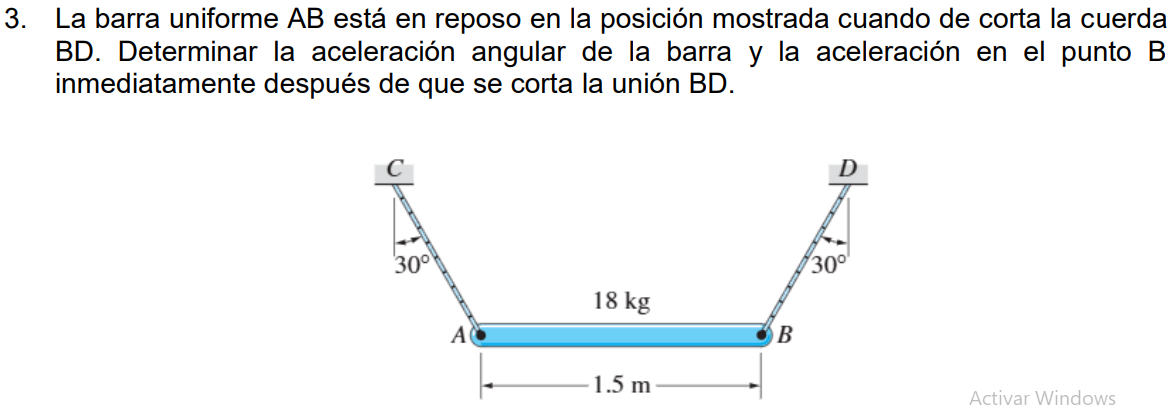

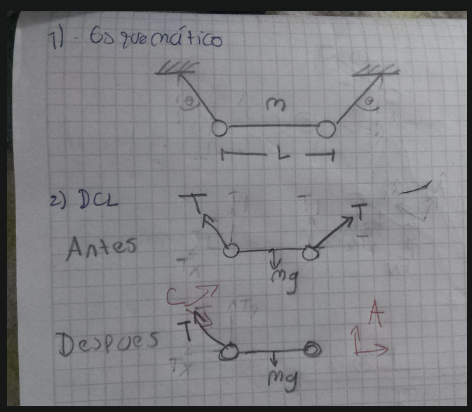

In [455]:
#Creamos nuestro marco de referencia y nuestros ángulos #beta para el de la cuerda 
# #theta para el de la barra 
N = ReferenceFrame("N") 
theta = dynamicsymbols("theta") 
beta = symbols("beta") 
C = N.orientnew("C", "Axis", (-pi/2 + beta,N.z)) 
A = N.orientnew("A", "Axis", (-theta,N.z)) #Desconocemos la aceleración del centro de masa 
ax, ay = symbols("ax, ay") 
#Definimos los valores conocidos y el tiempo  
m,g,L,t = symbols("m g L t") 
T = symbols("T")
#Hacemos sumatoria de fuerzas en X e Y 
sumFx = -T*C.x.dot(N.x) - m*ax 
sumFy = -T*C.x.dot(N.y) -m*g -m*ay 
I = (1/3)*m*L**2#Inercia en el extremo A 
alpha = theta.diff(t,t) 
#Definición de alpha o aceleración angular 
sumM = (L/2*A.x).cross(-m*g*N.y) - I*alpha*N.z  #sumatoria de momentos en A 
eq4 = eq4 = ax*(-sin(beta)) + (ay - (L/2)*alpha)*cos(beta)
eqs = [sumFx, sumFy, sumM.dot(N.z), eq4] 
incognitas = [theta.diff(t,t), ax, ay,T] 

AA , bb = sympy.linear_eq_to_matrix(eqs, incognitas) 
AA.solve(bb)

⎡                 -1.5⋅g⋅cos(θ)                   ⎤
⎢                 ──────────────                  ⎥
⎢                       L                         ⎥
⎢                                                 ⎥
⎢0.75⋅g⋅sin(β)⋅cos(β)⋅cos(θ) - 1.0⋅g⋅sin(β)⋅cos(β)⎥
⎢─────────────────────────────────────────────────⎥
⎢                   2             2               ⎥
⎢            1.0⋅sin (β) + 1.0⋅cos (β)            ⎥
⎢                                                 ⎥
⎢                2                2               ⎥
⎢     - 1.0⋅g⋅sin (β) - 0.75⋅g⋅cos (β)⋅cos(θ)     ⎥
⎢     ───────────────────────────────────────     ⎥
⎢                   2             2               ⎥
⎢            1.0⋅sin (β) + 1.0⋅cos (β)            ⎥
⎢                                                 ⎥
⎢    -0.75⋅g⋅m⋅cos(β)⋅cos(θ) + 1.0⋅g⋅m⋅cos(β)     ⎥
⎢    ────────────────────────────────────────     ⎥
⎢                  2             2                ⎥
⎣           1.0⋅sin (β) + 1.0⋅cos (β)             ⎦

In [456]:
params = {theta:0, theta.diff(t):0,beta:np.deg2rad(30), L:1.5, m:18, g:9.81}
alpha = AA.solve(bb)[0]
print("Valor de alpha, aceleración angular:")
display(alpha.subs(params))

a_B = AA.solve(bb)[1]*N.x + AA.solve(bb)[2]*N.y + (alpha*N.z).cross(L/2*A.x)
print("Valor de la aceleración en B")
display(a_B.express(N).subs(params).magnitude())


Valor de alpha, aceleración angular:


-9.81000000000000

Valor de la aceleración en B


15.3648684606312

Los cuales son muy parecidos a los resultados publicado en Bloque Neón. La principal diferencia puede deberse a la suposición que T es una incognita.

Pregunta 4

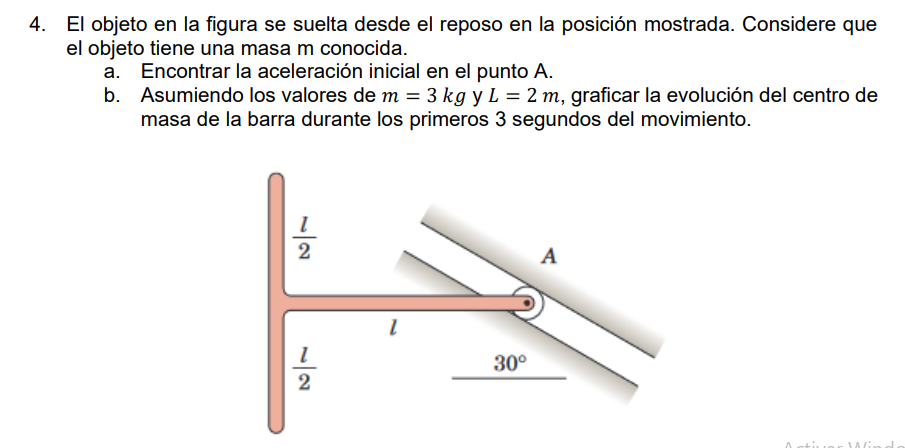

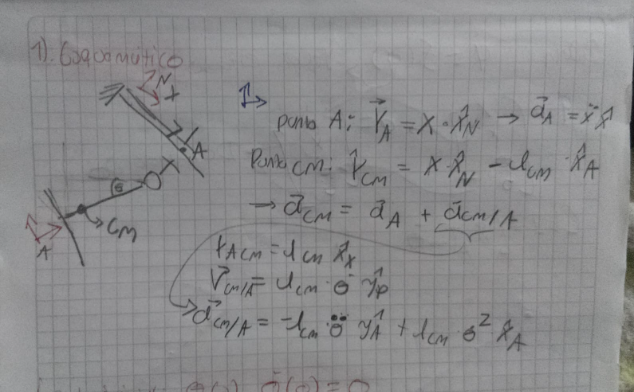

In [457]:
#Definimos nuestro marco de referencia global
N1 = ReferenceFrame("N")
x, theta = dynamicsymbols("x, theta") #como definimos theta, entonces crece con el momento, asi que theta doble punto es alfa
#x representa al desplazamiento en la ruta del slider
N2 = N1.orientnew("N2", "Axis", (-np.deg2rad(30), N1.z)) #Marco de referencia del Slider
A = N1.orientnew("A", "Axis", (theta, N1.z)) #Marco de referencia de la T

#Comprobación
display(A.x.express(N1).subs(theta,0)) #Si theta es 0, apunta como el normal

#Valores
l,m,g,t = symbols("l,m,g,t")
lcm = l/4*l #Verticalmente en dirección A.y no se ubicará el centro de masa dado que ambos L/2 se cancenlan
#Por lo que solo queda analizar en A.x, el sentido de la barra horizontal,
#Por un lado, como todo tiene longitud 2l, y la masa es m, entonces cada barra mide m/2
#Para hallar el centro de masa se usa (l*m+l*m)/(m+m), como se ignora el espesor de la barra, y el centro de masa de la barra horizontal queda en l/2
# se tiene
#cm = ((0*m/2)+((l/2)*(1/2*m)))/(m) = l/4
I_cm_barra = (1/12)*(m/2)*l**2 #en el centro de masa de cada barra, cada una con una masa m/2 y una longitud l
Icm = 2*(I_cm_barra + (m/2)*(l/4)**2) #cada barra se encuentra a una distancia de l/4 (ya que desde el extremo  izquierdo el cm se ubica a l/4), por lo que aplicamos Teorema de Ejes paralelos
#Sin embargo, este mismo proceso aplica a ambas barras, entonces multiplicamos por 2

#Cinematica: Expresar el cm
#Nuestro N1 se encuentra en el extremo izquierdo del tunel del slider
#Entonces para llegar al cm de la barra toca moverse X pasos desde el slider
#Y luego retroceder en N.x l - lcm, ya que el centro de masa se midió desde la izquierda, entonces la medida desde la derecha será l - medida izquierda
rcm = x*N2.x - (l- lcm)*A.x
acm = rcm.diff(t,N1).diff(t,N1) #derivada de un VECTOR
alpha = theta.diff(t,t) #diff(t,2) = diff(t,t) = diff(t,).diff(t) derivada de un ESCALAR

#Ecuaciones de Newton Euler
#No hay momentos en el slider porque no tiene masa, usualmente los sliders incluyen momentos.
F_n = symbols("F_n") #Fuerza normal que actúa en el slider
sumF = -F_n*N2.y - m*g*N1.y -m*acm #las fuerzas son: normal en el slider y peso de la T, se despeja la m*a

sumM = (lcm*A.x).cross(-F_n*N2.y) - Icm*alpha*N1.z #F_n produce momentos porque está alineado con la barra, si theta no es 60 (complementario)

eqs = [sumF.dot(N1.x), sumF.dot(N1.y), sumM.dot(N1.z)] #ecuaciones

AA , b = sympy.linear_eq_to_matrix(eqs, [x.diff(t,t), theta.diff(t,t), F_n])

#AA #solo depende de la posicion actual del sistema, hay términos que no dependen del ángulo, como la primera columna
#Aqui no aparece theta punto, solo en b
#b #terminos que no factorizan en las incognitas, terminos indepeneidnetes, el a_cm = -l*theta_dot**2


n_x

In [458]:
params = {m:3, l:2, g:9.81, theta:0, theta.diff(t):0}
print("Aceleración inicial en el punto A (Slider), x doble punto")
acel_inicial = AA.solve(b)[0].simplify().subs(params)
acel_inicial


Aceleración inicial en el punto A (Slider), x doble punto


2.14593750000000

In [459]:
theta_inicial = AA.solve(b)[1].simplify().subs(params)

A continuación me ayudo con ChatGpt para hacer las gráficas.

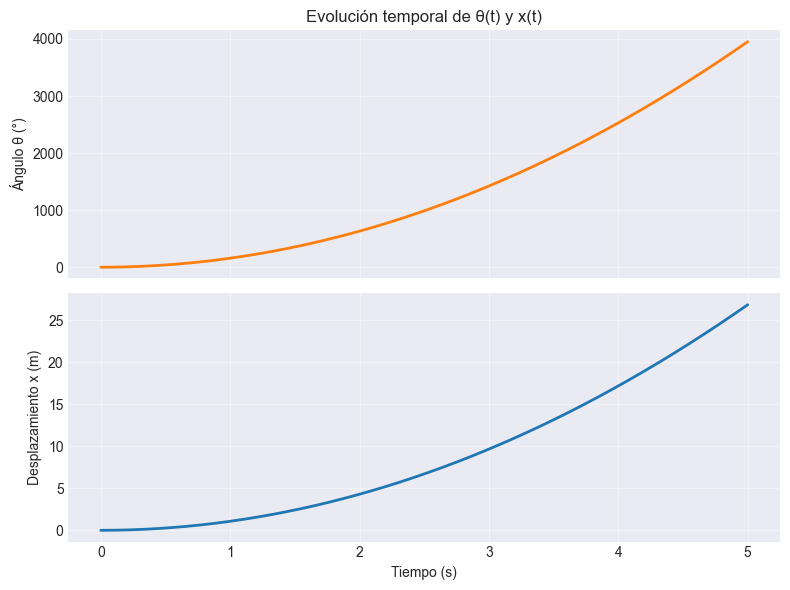

In [460]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Definimos variable de tiempo
t = sp.Symbol('t', real=True)

# Tus aceleraciones (sustituye con tus valores o expresiones)
theta_ddot = theta_inicial     # ejemplo: rad/s^2
x_ddot = acel_inicial              # ejemplo: m/s^2

# Integramos con condiciones iniciales theta(0)=0, theta'(0)=0
theta_dot = sp.integrate(theta_ddot, t)          # primera integración
theta = sp.integrate(theta_dot, t)               # segunda integración
theta = sp.simplify(theta)
# Aplicamos condiciones iniciales (ambas son 0)
theta = theta.subs(t, t)  # no cambia, es simbólico

# Igual para x(t)
x_dot = sp.integrate(x_ddot, t)
x = sp.integrate(x_dot, t)
x = sp.simplify(x)

# Creamos funciones numéricas
theta_func = sp.lambdify(t, theta, 'numpy')
x_func = sp.lambdify(t, x, 'numpy')

# Evaluamos para 5 s
t_vals = np.linspace(0, 5, 500)
theta_vals = theta_func(t_vals)
x_vals = x_func(t_vals)

# Graficamos
plt.style.use("seaborn-v0_8-darkgrid")
fig, ax = plt.subplots(2, 1, figsize=(8,6), sharex=True)

ax[0].plot(t_vals, np.rad2deg(theta_vals), color="#ff7f0e", lw=2)
ax[0].set_ylabel("Ángulo θ (°)")
ax[0].set_title("Evolución temporal de θ(t) y x(t)")
ax[0].grid(alpha=0.4)

ax[1].plot(t_vals, x_vals, color="#1f77b4", lw=2)
ax[1].set_ylabel("Desplazamiento x (m)")
ax[1].set_xlabel("Tiempo (s)")
ax[1].grid(alpha=0.4)

plt.tight_layout()
plt.show()
